<a href="https://colab.research.google.com/github/shubhankar-mern/MLBasicsLearn/blob/imp/RecommemndationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [34]:
column_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv('/content/content/MyDrive/ml-100k/u.data', sep="\t", names=column_names);

In [35]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [36]:
df.shape

(100000, 4)

In [37]:
df['user_id'].nunique()

943

In [38]:
df['item_id'].nunique()

1682

In [39]:
mdf = pd.read_csv('/content/content/MyDrive/ml-100k/u.item',sep="\|", header=None, encoding="ISO-8859-1");

In [27]:
mdf.shape

(1682, 24)

In [40]:
mdf = mdf[[0,1]]

In [41]:
mdf.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [42]:
mdf.columns = ["item_id", "title"]

In [43]:
mdf.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [44]:
merged_df = pd.merge(df,mdf,on="item_id")

In [46]:
merged_df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [47]:
merged_df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [48]:
### Exploratory data analysis

In [49]:
import seaborn as sns

In [52]:
merged_df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [54]:
merged_df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [57]:
ratings = pd.DataFrame(merged_df.groupby('title').mean()['rating'])

In [58]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [59]:
ratings['num of ratings'] = pd.DataFrame(merged_df.groupby('title').count()['rating'])

In [60]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [61]:
ratings.sort_values(by='rating',ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


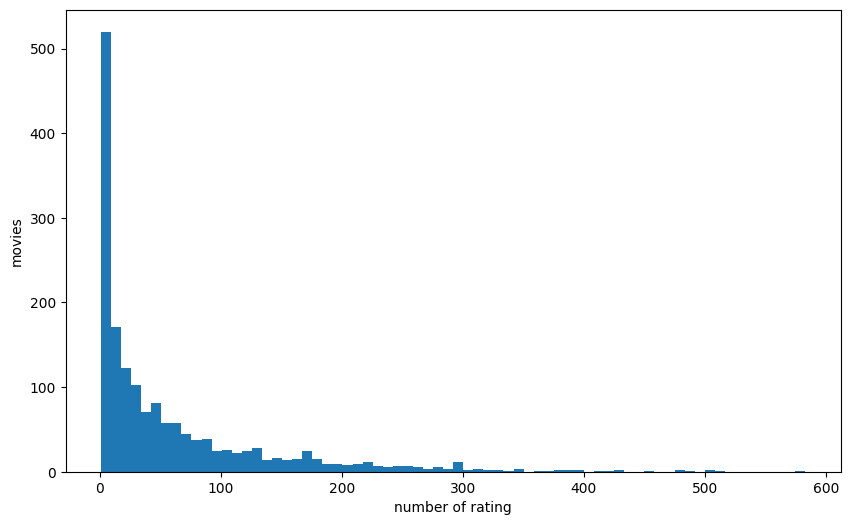

In [72]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins=70)
plt.xlabel('number of rating')
plt.ylabel('movies')
plt.show()

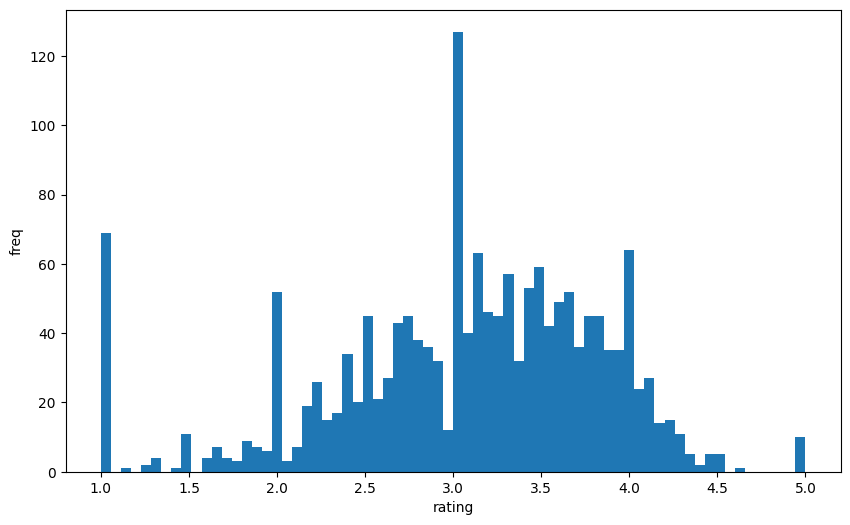

In [65]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'], bins=70)
plt.xlabel('rating')
plt.ylabel('freq')
plt.show()

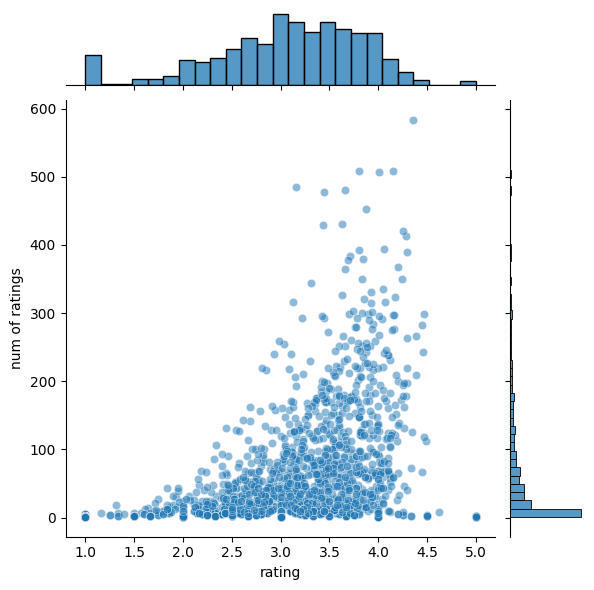

In [68]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)


In [69]:
## making of recommendation system

In [73]:
merged_df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [74]:
moviemat = merged_df.pivot_table(index="user_id",columns="title",values="rating")

In [75]:
moviemat.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [77]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [98]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [99]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [100]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])

In [101]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [103]:
corr_starwars.dropna(inplace=True)

In [104]:
corr_starwars.sort_values('Correlation', ascending=False).head(20)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [89]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [90]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [91]:
##Predict function

In [105]:
def predict_movies(movie_name):
  movie_user_ratings = moviemat[movie_name]
  similar_to_movie = moviemat.corrwith(movie_user_ratings)

  corr_movie = pd.DataFrame(similar_to_movie, columns=["Correlation"])
  corr_movie.dropna(inplace=True)

  corr_movie = corr_movie.join(ratings['num of ratings'])
  predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending=False)

  return predictions

In [108]:
d = predict_movies("Seven Years in Tibet (1997)")
d.head(10)

,Correlation,num of ratings
title,,
Seven Years in Tibet (1997),1.000000,155
Outbreak (1995),0.749990,104
Philadelphia (1993),0.717699,137
"River Wild, The (1994)",0.640866,146
Interview with the Vampire (1994),0.630719,137
Real Genius (1985),0.601338,119
Young Guns (1988),0.599263,101
"Frighteners, The (1996)",0.597323,115
Tombstone (1993),0.577422,108
